<a href="https://colab.research.google.com/github/Bigs97/Deep_Learning_CNN/blob/main/CNN_Improved_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print('Hello World')

Hello World


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Input,Flatten,Dense,Dropout,MaxPooling2D,GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [4]:
cifar10 = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [5]:
(X_train,y_train),(X_test,y_test) = cifar10

In [6]:
X_train,X_test = X_train/255.0,X_test/255.0
y_train,y_test = y_train.flatten(),y_test.flatten()
print("X_train shape:",X_train.shape, "Y_train shape:",y_train.shape)

X_train shape: (50000, 32, 32, 3) Y_train shape: (50000,)


In [7]:
K = len(set(y_test))
K

10

In [8]:
i = Input(shape = X_train[0].shape)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

In [9]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 31s 10ms/step - loss: 1.2702 - accuracy: 0.5675 - val_loss: 0.9963 - val_accuracy: 0.6578
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8296 - accuracy: 0.7136 - val_loss: 0.8706 - val_accuracy: 0.7072
Epoch 3/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6862 - accuracy: 0.7643 - val_loss: 0.7641 - val_accuracy: 0.7446
Epoch 4/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5755 - accuracy: 0.8040 - val_loss: 0.5977 - val_accuracy: 0.8012
Epoch 5/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4843 - accuracy: 0.8355 - val_loss: 0.6572 - val_accuracy: 0.7817
Epoch 6/15
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4145 - accuracy: 0.8564 - val_loss: 0.5752 - val_accuracy: 0.8155
Epoch 7/15
1563/1563 [==============================] - 26s 16ms/step - loss: 0.3498 - accuracy: 0.8804 - val_loss: 0.6239 - v

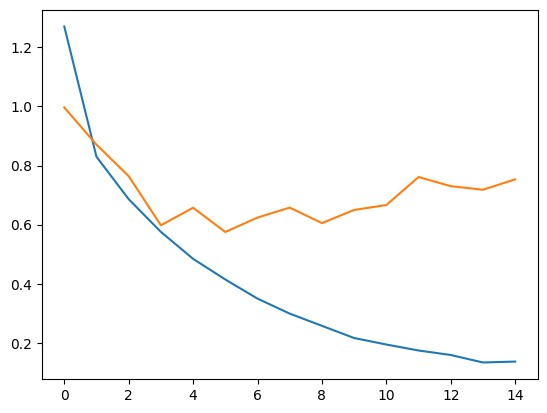

In [11]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.show()

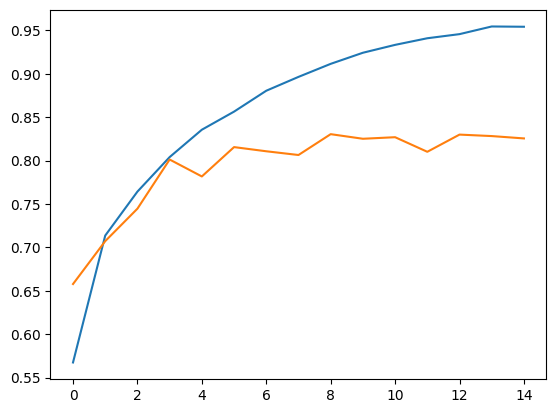

In [12]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.show()

In [13]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
train_generator = data_generator.flow(X_train,y_train,batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit_generator(train_generator,validation_data = (X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 15)

Epoch 1/15


<ipython-input-13-8ddea7b9ad25>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator,validation_data = (X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 15)


1562/1562 [==============================] - 40s 25ms/step - loss: 0.5956 - accuracy: 0.8080 - val_loss: 0.7331 - val_accuracy: 0.7781
Epoch 2/15
1562/1562 [==============================] - 39s 25ms/step - loss: 0.5011 - accuracy: 0.8325 - val_loss: 0.5546 - val_accuracy: 0.8213
Epoch 3/15
1562/1562 [==============================] - 39s 25ms/step - loss: 0.4591 - accuracy: 0.8446 - val_loss: 0.4762 - val_accuracy: 0.8429
Epoch 4/15
1562/1562 [==============================] - 39s 25ms/step - loss: 0.4344 - accuracy: 0.8520 - val_loss: 0.4923 - val_accuracy: 0.8396
Epoch 5/15
1562/1562 [==============================] - 37s 24ms/step - loss: 0.4155 - accuracy: 0.8576 - val_loss: 0.4689 - val_accuracy: 0.8416
Epoch 6/15
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3935 - accuracy: 0.8654 - val_loss: 0.5153 - val_accuracy: 0.8388
Epoch 7/15
1562/1562 [==============================] - 38s 25ms/step - loss: 0.3713 - accuracy: 0.8733 - val_loss: 0.4508 - val_accura

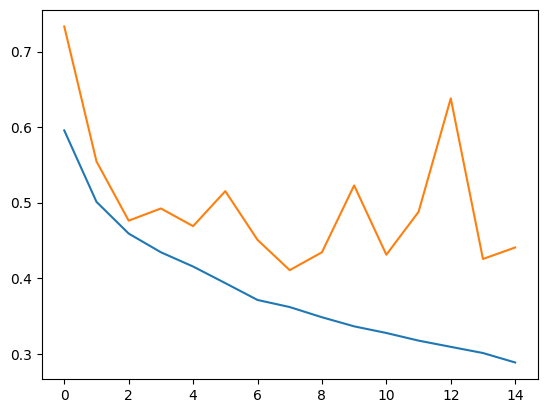

In [14]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.show()

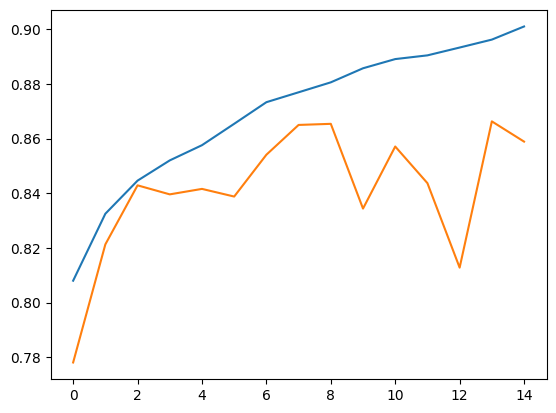

In [15]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.show()

313/313 [==============================] - 1s 4ms/step
Confustion matrix, without normalization
[[913  14  22   4   3   3  10   6  15  10]
 [  6 962   0   1   0   1   2   0   6  22]
 [ 45   5 807  25  15  26  59  13   2   3]
 [ 21  11  34 705  18 107  68  21   3  12]
 [  8   4  65  29 755  30  79  29   1   0]
 [ 12   4  29  90  17 790  31  24   1   2]
 [  6   0  12  18   2   6 951   3   1   1]
 [  8   0  12  20  17  26   5 906   0   6]
 [ 61  15   5   3   0   2   5   3 894  12]
 [ 13  61   3   3   0   3   3   1   7 906]]


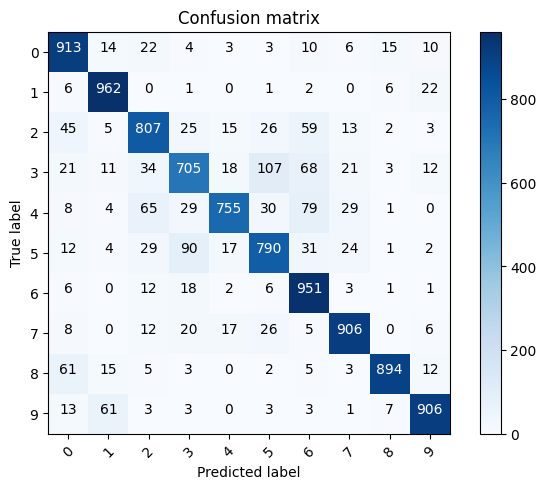

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confustion matrix, without normalization')
  print(cm)

  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [19]:
labels = '''
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split()

Text(0.5, 1.0, 'True label:ship Predicted label:truck')

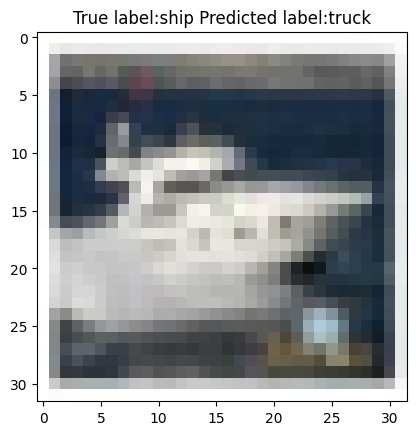

In [23]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap = 'gray')
plt.title(f'True label:{labels[y_test[i]]} Predicted label:{labels[p_test[i]]}')

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     